In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import library
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from collections import Counter
import community

# **Dataset**

Source : https://snap.stanford.edu/data/ego-Twitter.html

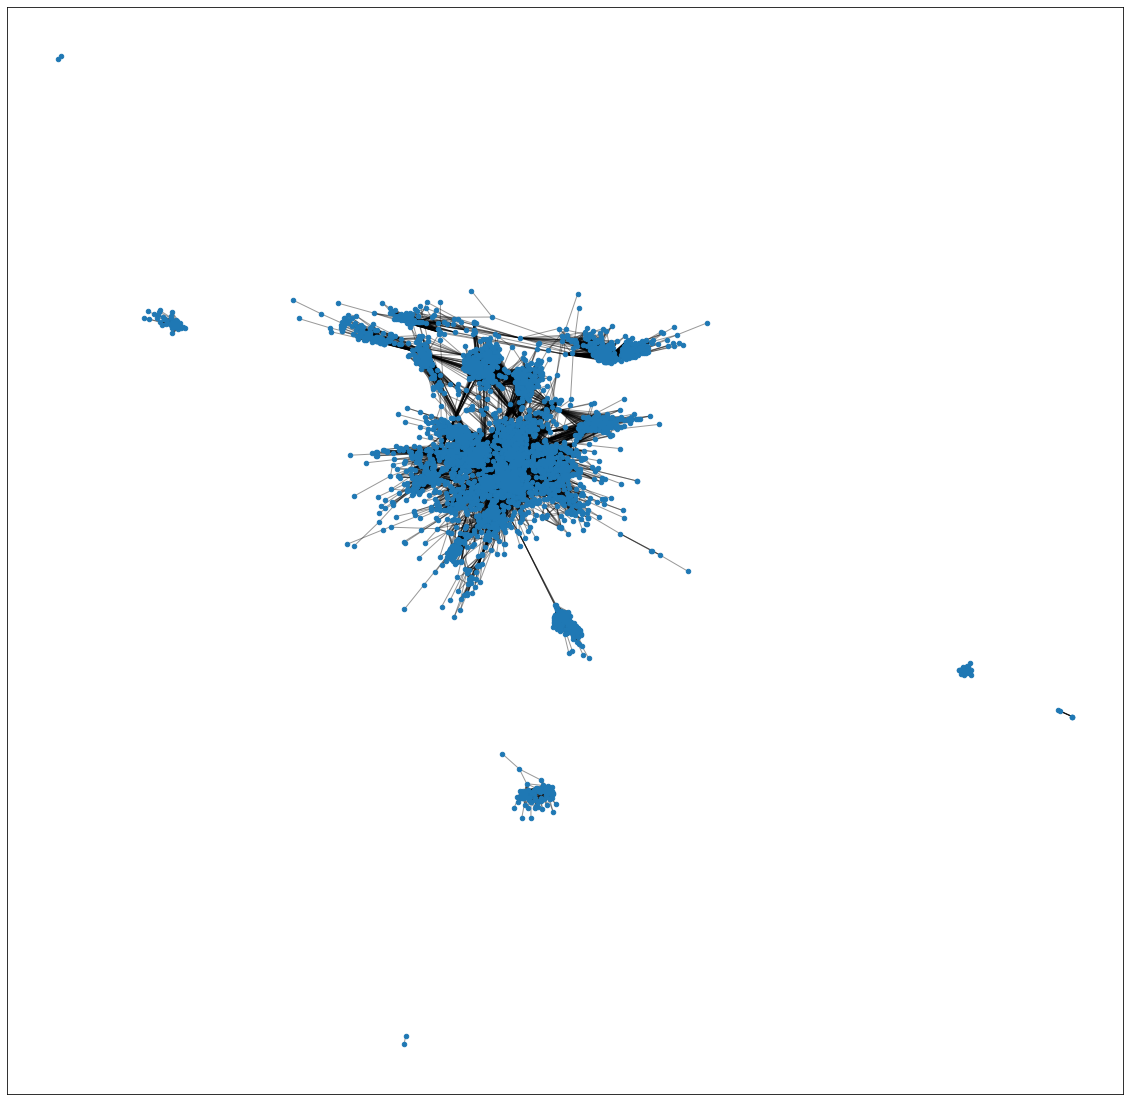

In [ ]:
#membaca dataset
G_Tw = nx.read_edgelist("/content/drive/My Drive/twitter_combined/twitter_combined.txt", create_using = nx.Graph(), nodetype=int)
pos = nx.spring_layout(G_Tw)
#membuat graph
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(G_Tw, pos, node_size=20, with_labels=True)
nx.draw_networkx_edges(G_Tw, pos, alpha=0.4)

plt.savefig("/content/drive/My Drive/twitter_combined/Dataset.png")

# **Influential Users**
> Betweenness Cetrality Methods



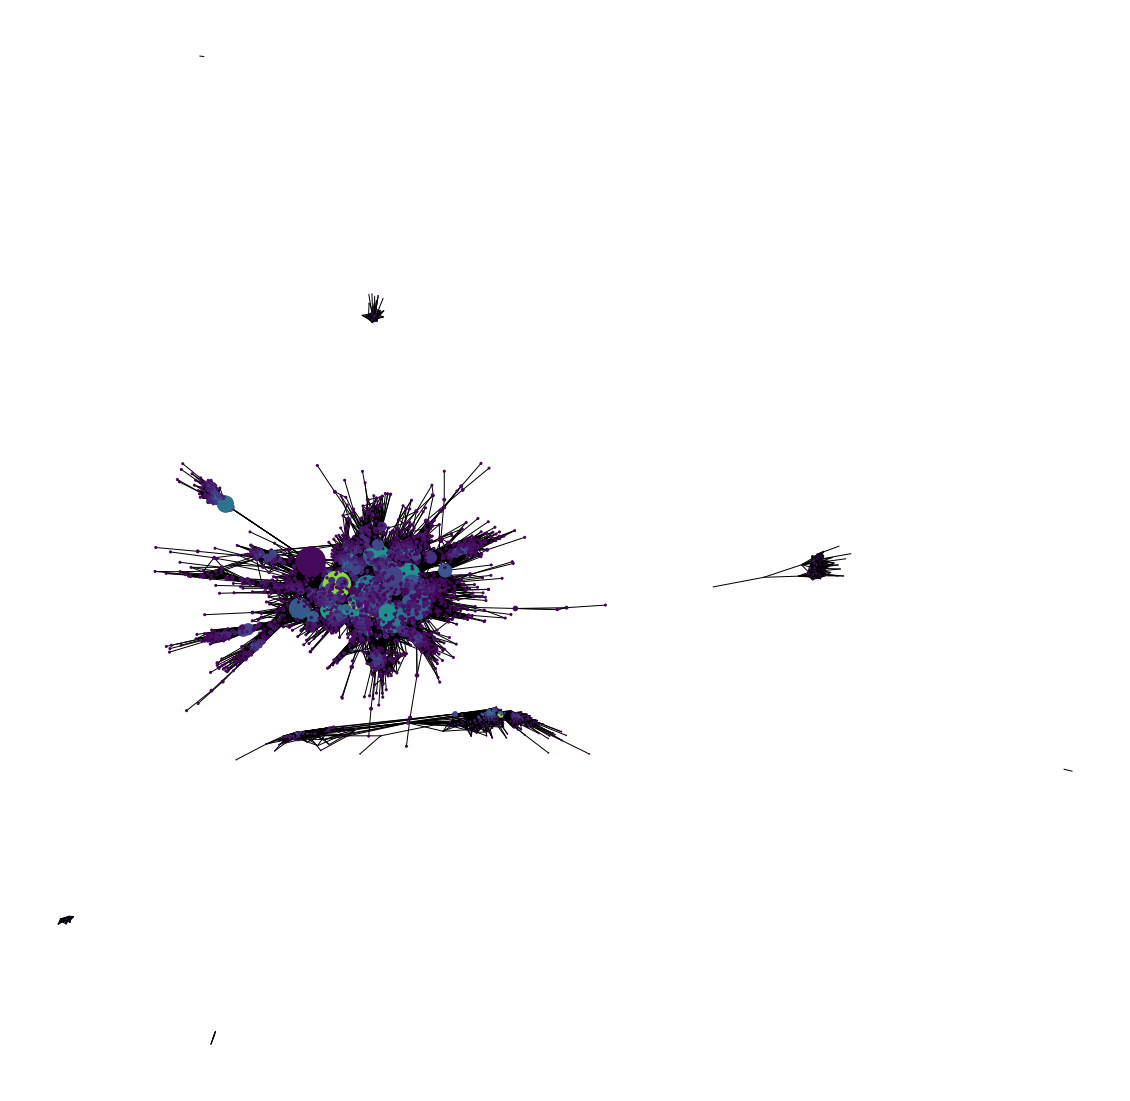

In [ ]:
#untuk merepresentasikan dan menemukan most influential users dengan menggunakan betweeness centrality.
pos = nx.spring_layout(G_Tw)
betCent = nx.betweenness_centrality(G_Tw, normalized=True, endpoints=True)
node_color = [20000.0 * G_Tw.degree(v) for v in G_Tw]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_Tw, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

plt.savefig("/content/drive/My Drive/twitter_combined/influential User (Betweenness Centrality).png")

In [ ]:
#melihat values masing masing node dengan betweeness centrality
nx.betweenness_centrality(G_Tw)

{214328887: 8.57943521760259e-06,
 34428380: 0.0008933774875164199,
 17116707: 2.0150582616533057e-05,
 28465635: 0.00015804582280516297,
 380580781: 1.6906600388671824e-06,
 18996905: 6.674744613639553e-05,
 221036078: 1.4848202948591416e-06,
 153460275: 4.603875977377721e-07,
 107830991: 5.162977086792261e-06,
 17868918: 3.813161571526225e-05,
 151338729: 3.210677740935177e-05,
 222261763: 6.17232057750969e-06,
 19705747: 2.5928095493129835e-05,
 88323281: 5.75534215726056e-05,
 19933035: 8.655966746114178e-06,
 149538028: 7.94217283761772e-06,
 158419434: 3.525741699712414e-05,
 17434613: 1.0733335962486164e-05,
 153226312: 2.478019005932589e-05,
 364971269: 6.455292962311371e-06,
 100581193: 3.141496321443748e-05,
 279787626: 0.0001260276379488144,
 113058991: 7.856027061549606e-06,
 69592091: 2.4401032255812807e-05,
 187773078: 0.0001257564396013303,
 406628822: 3.61227487029642e-06,
 262802533: 7.193618074793411e-07,
 460282402: 5.606851354882071e-07,
 280935165: 5.46705296909804

In [ ]:
sorted(betCent, key=betCent.get, reverse=True)[:100]

[17093617,
 783214,
 41716273,
 15666380,
 3359851,
 48485771,
 115485051,
 19725644,
 1268821,
 10228272,
 15134782,
 4620451,
 3829151,
 7861312,
 12611642,
 59804598,
 43952326,
 18948541,
 15913,
 15439395,
 15858135,
 15934926,
 309366491,
 98942778,
 19802879,
 5442012,
 17681513,
 20880546,
 15234657,
 15165493,
 10671602,
 16303106,
 15234407,
 73975665,
 1183041,
 7081402,
 63485337,
 16302651,
 2172,
 3004231,
 1211311,
 31119337,
 32675894,
 20536157,
 20273398,
 18927441,
 259379883,
 144040563,
 28420827,
 18581803,
 14681605,
 10350,
 18821907,
 41147062,
 50393960,
 8295072,
 22027186,
 18393773,
 263420771,
 17378488,
 33998183,
 18713254,
 7860742,
 139162440,
 19399719,
 30313925,
 14208982,
 15451233,
 16098603,
 27855118,
 22461427,
 20747847,
 14824849,
 20060293,
 9726632,
 52758395,
 1175321,
 6480682,
 15584619,
 28037700,
 21770611,
 121258930,
 24447643,
 175624200,
 28297965,
 101859065,
 18194898,
 15575251,
 15102849,
 17156000,
 15519544,
 11348282,
 18825

# **TOP 5 Influential Users**

In [ ]:
#menemukan most influential users dengan mensortir menjadi 5 node teratas
influentials = []
most_influential = nx.betweenness_centrality(G_Tw)
for w in sorted(most_influential, key=most_influential.get, reverse=True)[:5]:
    influentials.append(w)
    print(w, most_influential[w])

17093617 0.09213979977533762
783214 0.08562137017443493
41716273 0.08552761505870383
15666380 0.08013042325207921
3359851 0.07607026214734106


In [ ]:
#node nomor pertama teratas mengambil semua node yang terhubung ke node nya yang dilakukan dengan bfs algoritma
grup1 = nx.bfs_tree(G_Tw, influentials[0])

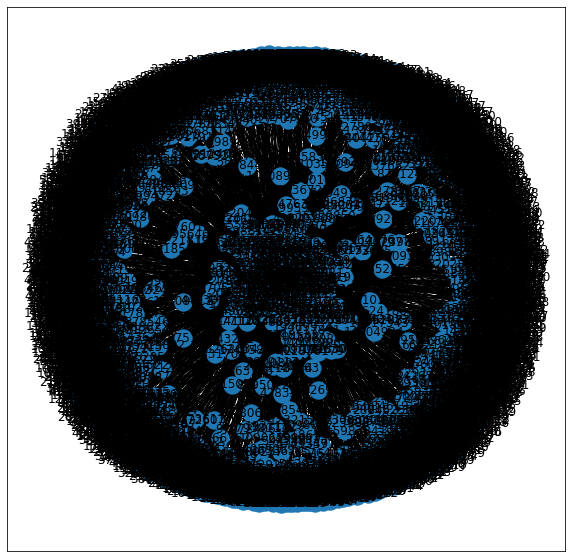

In [ ]:
plt.figure(figsize=(10,10))
nx.draw_networkx(grup1)
plt.savefig("/content/drive/My Drive/twitter_combined/influential_1.png")
plt.show()

In [ ]:
#node nomor dua teratas mengambil semua node yang terhubung ke node nya yang dilakukan dengan bfs algoritm
grup2 = nx.bfs_tree(G_Tw, influentials[1])

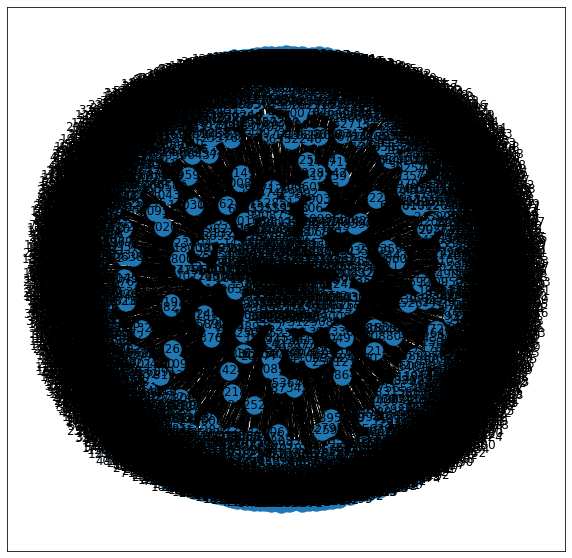

In [ ]:
plt.figure(figsize=(10,10))
nx.draw_networkx(grup2)
plt.savefig("/content/drive/My Drive/twitter_combined/influential_2.png")
plt.show()

In [ ]:
#node nomor tiga teratas mengambil semua node yang terhubung ke node nya yang dilakukan dengan bfs algoritm
grup3 = nx.bfs_tree(G_Tw, influentials[2])

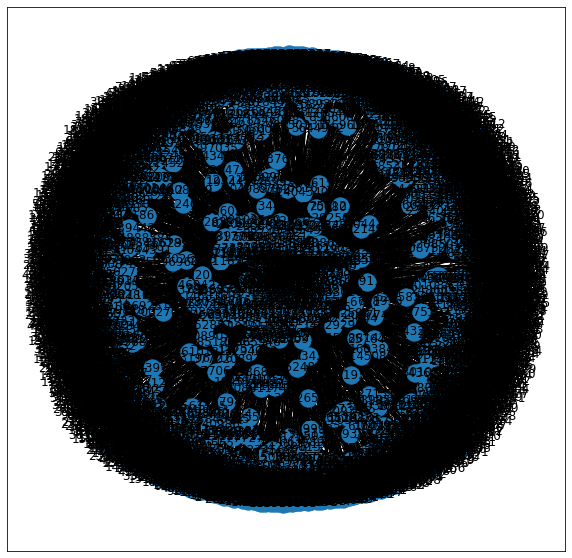

In [ ]:
plt.figure(figsize=(10,10))
nx.draw_networkx(grup3)
plt.savefig("/content/drive/My Drive/twitter_combined/influential_3.png")
plt.show()

In [ ]:
#node nomor empat teratas mengambil semua node yang terhubung ke node nya yang dilakukan dengan bfs algoritm
grup4 = nx.bfs_tree(G_Tw, influentials[3])

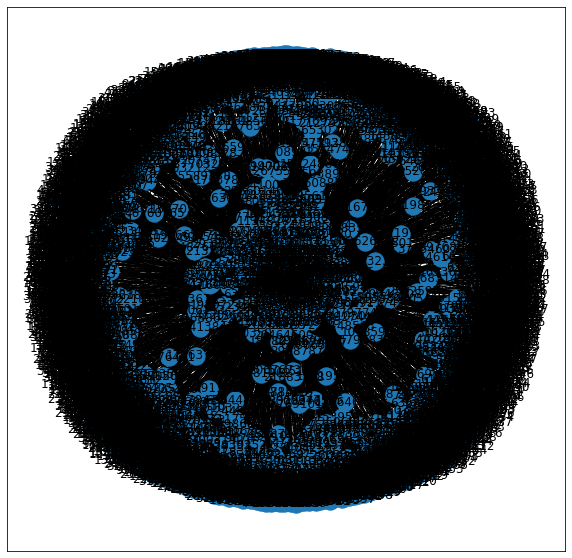

In [ ]:
plt.figure(figsize=(10,10))
nx.draw_networkx(grup4)
plt.savefig("/content/drive/My Drive/twitter_combined/influential_4.png")
plt.show()

In [ ]:
#node nomor lima teratas mengambil semua node yang terhubung ke node nya yang dilakukan dengan bfs algoritm
grup5 = nx.bfs_tree(G_Tw, influentials[4])

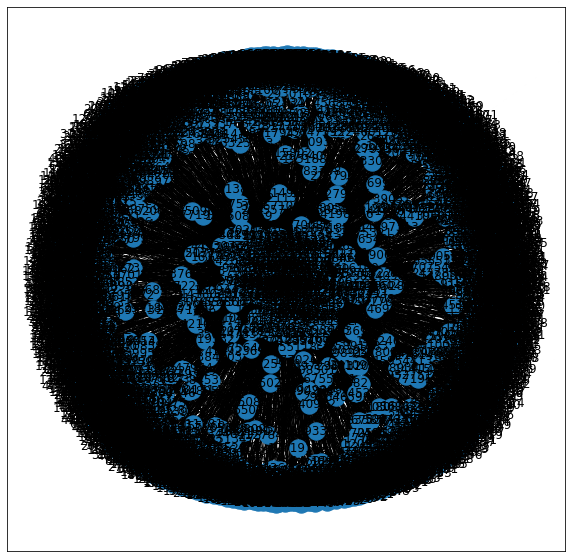

In [ ]:
plt.figure(figsize=(10,10))
nx.draw_networkx(grup5)
plt.savefig("/content/drive/My Drive/twitter_combined/influential_5.png")
plt.show()

# **Community Detection**
> Louvain Algorithm Methods

In [ ]:
#Inisiasi dengan partisi awal grafik dan menjalankan algoritma Louvain untuk mendapatkan Community Detection
hslpartisi=community.best_partition(G_Tw, weight='MsgCount')
print('Louvain algorithm.... ' )
values=[hslpartisi.get(node) for node in G_Tw.nodes()]
list_community=hslpartisi.values()

#Membuat kamus seperti {community_number: list_of_participants}
dict_nodes={}

#Mengisi kamus dengan item atau dengan rumus
for each_item in hslpartisi.items():
    community_num=each_item[1]
    community_node=each_item[0]
    if community_num in dict_nodes:
        value=str(dict_nodes.get(community_num)) + ' | ' + str(community_node)
        dict_nodes.update({community_num:value})
    else:
        dict_nodes.update({community_num:community_node})

# Membuat dataframe dari data dan mengoutputkan dalam bentuk excel
community_df=pd.DataFrame.from_dict(dict_nodes, orient='index',columns=['Daftar Anggota'])
community_df.index.rename('Komunitas' , inplace=True)
community_df.to_csv('List_Komunitas.csv')

Louvain algorithm.... 


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


Modularitas:  0.8558961268533233
Total Community= 23


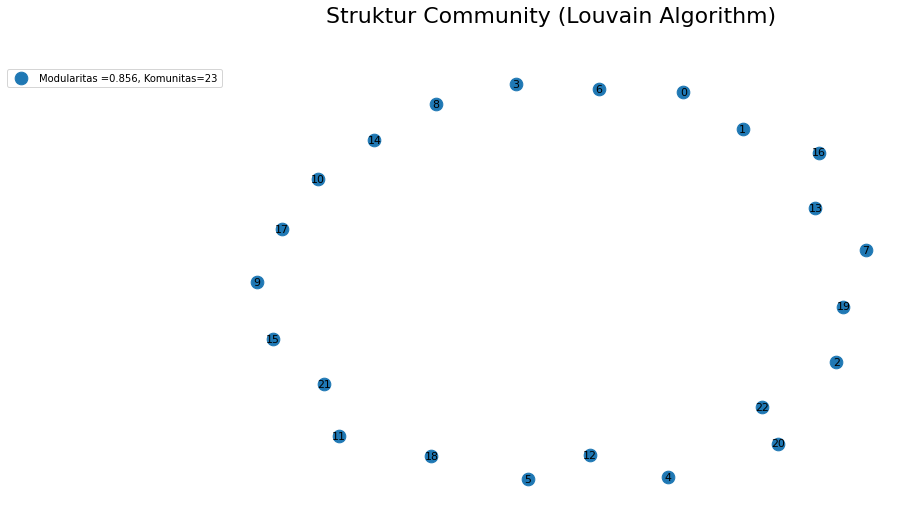

In [ ]:
#Membuat graph baru untuk merepresentasikan komunitas yang telah dibuat menggunakan louvian algoritm
matplotlib.rcParams['figure.figsize']= [12, 8]
G_comm=nx.Graph()

#Mengisi data dari kamus simpul yang dibuat sebelumnya
G_comm.add_nodes_from(dict_nodes)

# Menghitung modularitas dan jumlah total komunitas
mod=community.modularity(hslpartisi,G_Tw)
print("Modularitas: ", mod)
print("Total Community=", len(G_comm.nodes()))

# Membuat Grafik dan menghitung Modularitas
matplotlib.rcParams['figure.figsize']= [12, 8]
pos_louvain=nx.spring_layout(G_comm)
nx.draw_networkx(G_comm, pos_louvain, with_labels=True,node_size=160,font_size=11,label='Modularitas =' + str(round(mod,3)) +
                    ', Komunitas=' + str(len(G_comm.nodes())))
plt.suptitle('Struktur Community (Louvain Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('louvain_algoritm.png',dpi=400, bbox_inches='tight')

In [ ]:
#Melihat daftar komunitas
community_df

,Daftar Anggota
Komunitas,
0,214328887 | 34428380 | 17116707 | 28465635 | 3...
1,72680406 | 11259362 | 16216637 | 767809 | 3069...
2,236575672 | 82030021 | 17037417 | 28149277 | 1...
3,131601987 | 90779436 | 18927441 | 15913 | 1557...
4,22784458 | 7860742 | 18666844 | 14888584 | 160...
5,14876672 | 23152989 | 32032000 | 19507713 | 16...
6,203623462 | 61065794 | 301695120 | 102364313 |...
7,5490392 | 50393960 | 17064514 | 248992493 | 17...
8,35831704 | 18713254 | 17719233 | 6480652 | 360...


# **(Result) Community Detection**
> Louvain Algorithm Methods



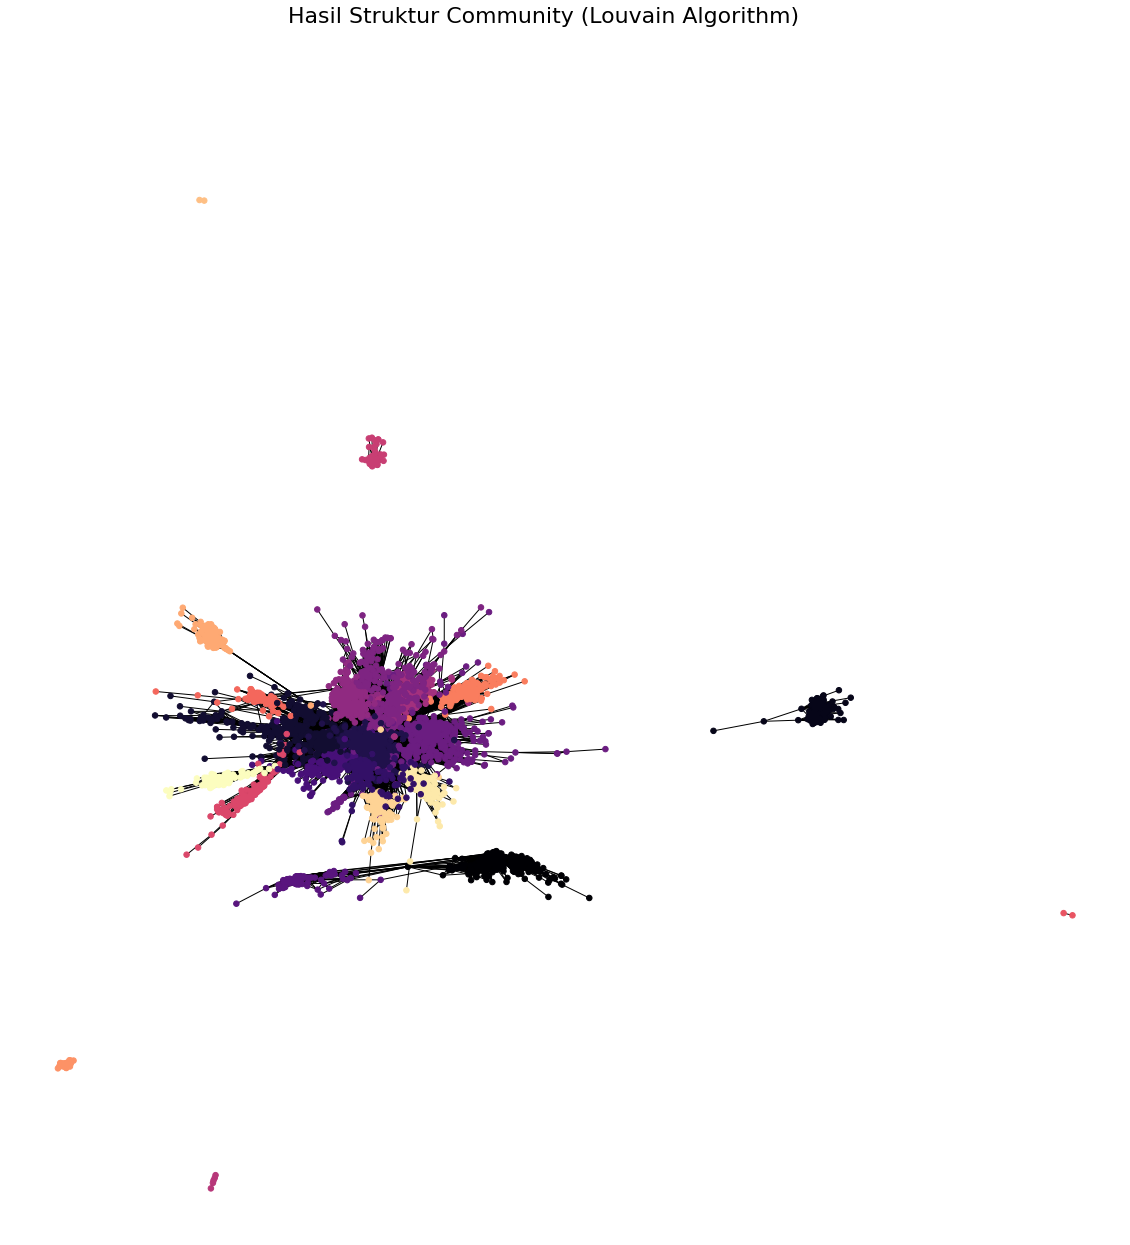

In [ ]:
# Menampilkan grafik dengan warna berbeda untuk setiap komunitas
plt.figure(figsize=(20,20))
nx.draw_networkx(G_Tw, pos, cmap=plt.get_cmap('magma'), node_color=values,node_size=30, with_labels=False)
plt.suptitle('Hasil Struktur Community (Louvain Algorithm) ',fontsize=22)
plt.box(on=None)
plt.axis('off')
plt.savefig('Result_louvain_Algoritm.png',dpi=400, bbox_inches='tight')
plt.show()